In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

In [3]:
import time
from tqdm import tqdm

In [5]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [6]:
movie = pd.read_csv("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/MovieGenre.csv", encoding='latin-1')

In [7]:
movie.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [8]:
# for i in range(0, len(movie.Poster)):
#     a = movie.Poster[i]
#     b = movie.Title[i]+".jpg"
#     ! wget -O "$b" "$a"

In [9]:
# ! pip install matplotlib

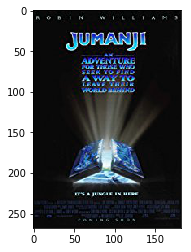

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/Jumanji (1995).jpg")
plt.imshow(img)

In [11]:
img.shape

(268, 182, 3)

In [12]:
x = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    img = cv2.imread(sb)
    x.append(img)


100%|██████████| 37971/37971 [01:11<00:00, 528.74it/s]


In [13]:
trash = []

In [14]:
for i in range(len(x)):
    if type(x[i]) != type(x[0]):
        trash.append(i)

In [15]:
counter = 0
for i in trash:
    del x[i-counter]
    counter+= 1

In [16]:
shape_trash = []

In [17]:
for i in range(len(x)):
    if (x[i].shape) != (x[0].shape):
        shape_trash.append(i)

In [18]:
shape_trash

[67,
 8315,
 8377,
 10381,
 12558,
 14038,
 14213,
 14464,
 15909,
 17532,
 18735,
 19751,
 23318,
 26313,
 35620]

In [19]:
trash

[48]

In [20]:
counter = 0
for i in shape_trash:
    del x[i-counter]
    counter+= 1

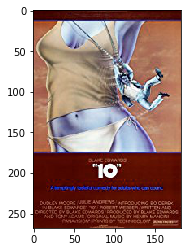

In [21]:
plt.imshow(x[60])

In [22]:
x = np.asarray(x)

In [23]:
a = []
for name in (os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/")):
    sb = os.path.splitext(name)[0]
    a.append(sb)
a
titles = pd.DataFrame(a, columns = ['Title'])

In [24]:
merge = pd.merge(titles,movie, on = ['Title'], left_index = True, right_index = True)
merge

,Title,imdbId,Imdb Link,IMDB Score,Genre,Poster
0,(2012),114709,http://www.imdb.com/title/tt114709,8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,a Day (2008),113497,http://www.imdb.com/title/tt113497,6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,#1 Cheerleader Camp (2010),113228,http://www.imdb.com/title/tt113228,6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,#chicagoGirl: The Social Network Takes on a Di...,114885,http://www.imdb.com/title/tt114885,5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,#Horror (2015),113041,http://www.imdb.com/title/tt113041,5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
5,#Pellichoopulu (2016),113277,http://www.imdb.com/title/tt113277,8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...
6,'71 (2014),114319,http://www.imdb.com/title/tt114319,6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
7,'D' (2005),112302,http://www.imdb.com/title/tt112302,5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
8,'Doc' (1971),114576,http://www.imdb.com/title/tt114576,5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...
9,'Fun on a Week-End' (1947),113189,http://www.imdb.com/title/tt113189,7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...


In [25]:
one_hot = pd.get_dummies(movie['Genre'])
df = merge.drop('Genre', axis=1)
df = merge['Genre'].str.join(sep='').str.get_dummies(sep='|')
df['title'] = merge.Title
df

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,title
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(2012)
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,a Day (2008)
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,#1 Cheerleader Camp (2010)
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,#chicagoGirl: The Social Network Takes on a Di...
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,#Horror (2015)
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,#Pellichoopulu (2016)
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'71 (2014)
7,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'D' (2005)
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,'Doc' (1971)
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,'Fun on a Week-End' (1947)


In [26]:
df.loc[df['Game-Show'] == 1]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,title
25809,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shining Night: A Portrait of Composer Morten L...


In [27]:
df = df.drop(df.index[trash])
df

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,title
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(2012)
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,a Day (2008)
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,#1 Cheerleader Camp (2010)
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,#chicagoGirl: The Social Network Takes on a Di...
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,#Horror (2015)
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,#Pellichoopulu (2016)
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'71 (2014)
7,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'D' (2005)
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,'Doc' (1971)
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,'Fun on a Week-End' (1947)


In [28]:
df = df.drop(df.index[shape_trash])
df

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,title
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(2012)
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,a Day (2008)
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,#1 Cheerleader Camp (2010)
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,#chicagoGirl: The Social Network Takes on a Di...
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,#Horror (2015)
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,#Pellichoopulu (2016)
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'71 (2014)
7,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'D' (2005)
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,'Doc' (1971)
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,'Fun on a Week-End' (1947)


In [29]:
df.reset_index(drop=True)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,title
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(2012)
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,a Day (2008)
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,#1 Cheerleader Camp (2010)
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,#chicagoGirl: The Social Network Takes on a Di...
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,#Horror (2015)
5,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,#Pellichoopulu (2016)
6,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'71 (2014)
7,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,'D' (2005)
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,'Doc' (1971)
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,'Fun on a Week-End' (1947)


In [30]:
a = ['Drama', 'Comedy', 'Romance', 'Horror', 'Action', 'Crime']
b = [x for x in df.columns if x not in a]
l = df.drop(b, axis = 1)

In [31]:
y = l.values

In [32]:
y.shape

(37955, 6)

In [33]:
x[0].shape

(268, 182, 3)

In [34]:
for i in range(len(x)):
    if type(x[i]) != type(x[0]):
        print(i)

In [35]:
x = np.stack(x)

In [36]:
x.shape

(37955, 268, 182, 3)

In [37]:
y.shape

(37955, 6)

In [38]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
model = Sequential([
        Conv2D(32, kernel_dimensions1, padding='same', input_shape=x_train.shape[1:], activation='relu'),
        Conv2D(32, kernel_dimensions1, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, kernel_dimensions2, padding='same', activation='relu'),
        Conv2D(64, kernel_dimensions2, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])

In [46]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(.25))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(268, 182, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [41]:
x_train.shape

(26568, 268, 182, 3)

In [42]:
y_train.shape

(26568, 6)

In [43]:
# x_train = np.array(x_train)
# y_train = np.array(y_train)

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 266, 180, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 90, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 88, 32)       9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 44, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41664)             0         
__________

In [48]:
model.fit(x_train, y_train,
          batch_size=32, nb_epoch=100, verbose=1)

/usr/local/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
26568/26568 [==============================] - 1534s 58ms/step - loss: 4.4654 - acc: 0.2762
Epoch 2/100
11904/26568 [============>.................] - ETA: 1:13:17 - loss: 4.3527 - acc: 0.2756

KeyboardInterrupt: 

In [ ]:
prediction = model.predict(x_test)